# Lecture 5: Fourier Transform Properties


In [14]:
# Imports etc.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

font = {'weight' : 'normal',
        'size'   : 16}

# Definition of the Fourier Transform
The Fourier Transform (FT) for a continuous signal $f(x)$ is defined as follows:
$$\hat{f}(u) = \int_{-\infty}^{\infty} f(x) e^{-i 2 \pi x u} dx$$
Generally, this FT operation can be viewed as expressing a time-domain signal (if the variable $x$ corresponds to time) in terms of its temporal frequency components, or a spatial-domain signal in terms of its spatial frequency components. 


# Definition of the inverse Fourier Transform

The inverse Fourier Transform (iFT) can be expressed as follows: 
$$f(x) = \int_{-\infty}^{\infty} \hat{f}(u)  e^{i 2 \pi x u} d u$$
which is essentially the same expression as the FT, except the sign on the exponential is flipped. 
The signals $f(x)$ and $\hat{f}(u)$ are referred to as a Fourier Transform pair. 


<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
/var/folders/gh/vmf5xzv17mbb56zqsgk66ptr0000gp/T/ipykernel_34102/2724404925.py:29: SyntaxWarning: invalid escape sequence '\h'
  plt.title('$\hat{f}(u)$')


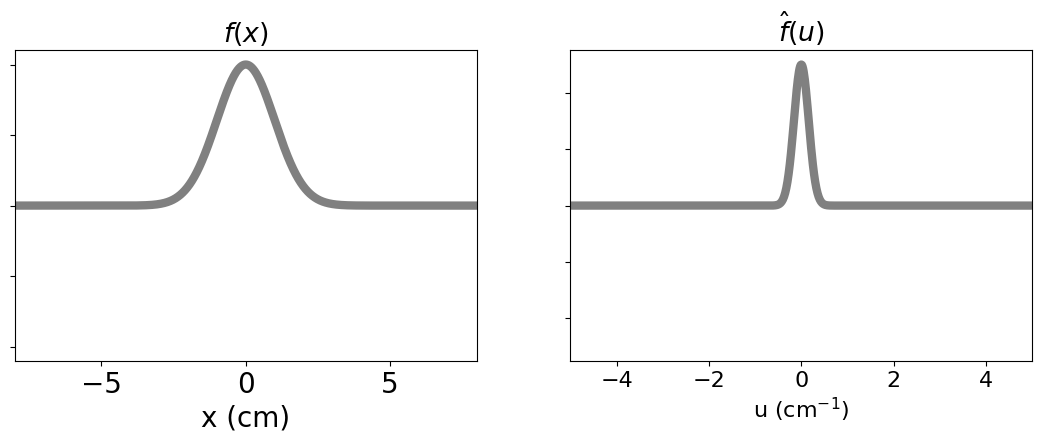

In [15]:
# Let's plot a signal and its FT
N = 20001
xmax = 40
x = np.linspace(-xmax,xmax,N)
dx = x[1] - x[0]
f = 1.0*(np.exp(-x*x/2))


# Calculate a (discrete) Fourier transform
umax = 1/(2*dx)
u = np.linspace(-umax,umax,N)
fhat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f)))


# Plot f and fhat
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)


# Modulation property

For any signal $f_1(x)$  with FT $\hat{f}_1(u)$, the FT of its modulated version $f_2(x) = e^{i2 \pi x u_0  } f_1(x)$ (ie: modulated by a complex exponential with frequency $u_0$) is given by a translated version of $\hat{f}_1(u)$:
$$ \hat{f}_2(u) = \hat{f}_1(u - u_0)$$

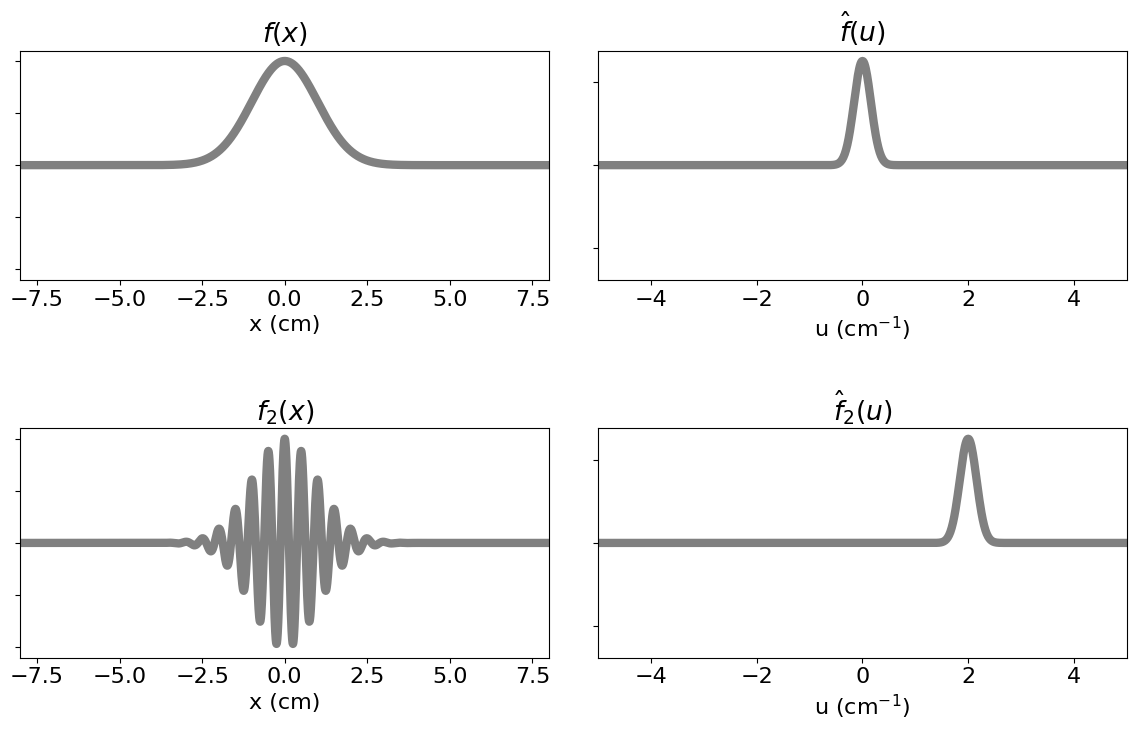

In [16]:
# Modulate by some frequency
u0 = 2 # Modulation frequency
f2 = f*np.exp(1j*2*np.pi*u0*x)
#f2 = f*np.cos(2*np.pi*u0*x)
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))



# Plot f and fhat
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(2,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title(r'$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=4.0)

# Plot f2 and fhat2
plt.subplot(2,2,3)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')
plt.subplot(2,2,4)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title(r'$\hat{f}_2(u)$')
plt.tight_layout(pad=2.0)

# Spatial scaling.

For any signal $f_1(x)$  with FT $\hat{f}_1(u)$, the FT of its spatially scaled version $f_2(x) = f_1(a x)$ for any nonzero complex valued scalar $a$, is given by
$$\hat{f}_2(u) = \frac{1}{|a|} \hat{f}_1(\frac{u}{a})$$

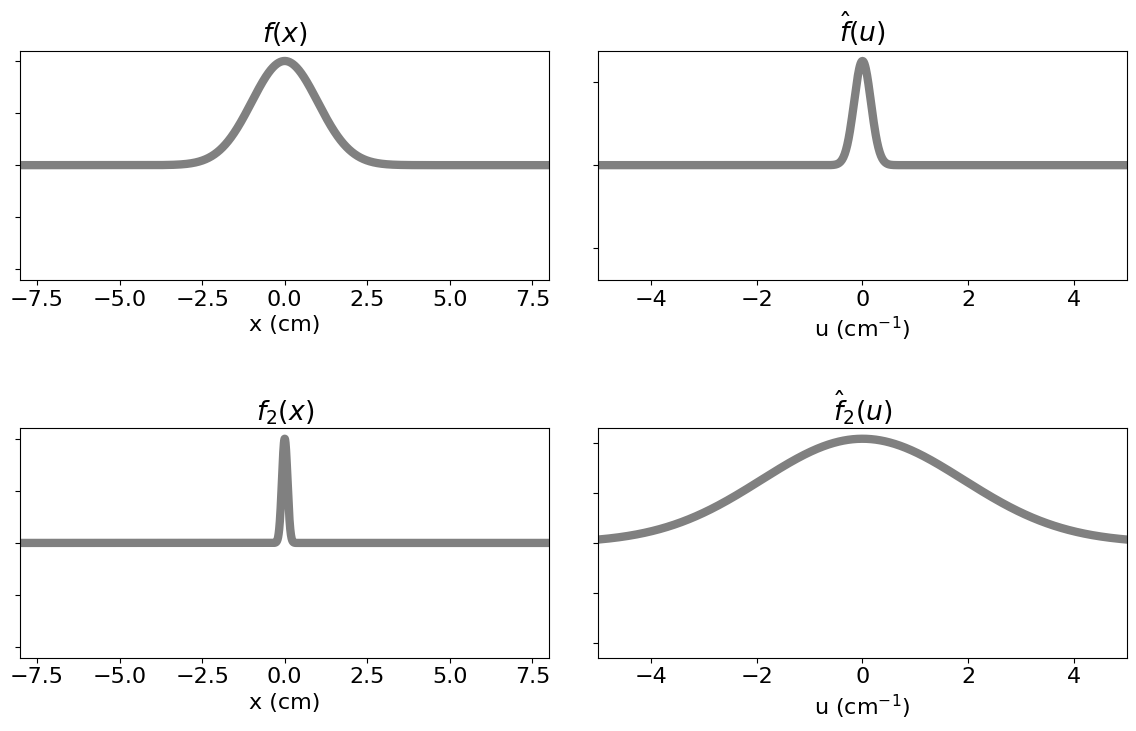

In [17]:
a = 12 # Spatial scaling factor
f2 = 1.0*(np.exp(-(a*x)*(a*x)/2))
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2))) 


# Plot f and fhat
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(f),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f)),1.1*np.max(np.abs(f))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f(x)$')
plt.subplot(2,2,2)
plt.rc('font', **font)
plt.plot(u,np.real(fhat),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat)),1.1*np.max(np.abs(fhat))])
plt.tick_params(axis='y',labelleft=False)
plt.title(r'$\hat{f}(u)$')
plt.xlabel('u (cm$^{-1}$)')

# Plot f2 and fhat2
plt.subplot(2,2,3)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
plt.tick_params(axis='y',labelleft=False)
plt.title('$f_2(x)$')
plt.xlabel('x (cm)')
plt.subplot(2,2,4)
plt.rc('font', **font)
plt.plot(u,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-5,5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
plt.tick_params(axis='y',labelleft=False)
plt.xlabel('u (cm$^{-1}$)')
plt.title(r'$\hat{f}_2(u)$')
plt.tight_layout(pad=2.0)

## Convolution Theorem

For any FT pairs $f_1(x) \Leftrightarrow \hat{f}_1(u)$, and  $f_2(x) \Leftrightarrow \hat{f}_2(u)$, the convolution of $f_1$ and $f_2$, $f_3(x) = \left[ f_1 * f_2 \right] (x)$ has FT given by:
$$ \hat{f}_3(u) = \hat{f}_1(u) \cdot \hat{f}_2(u) $$
In other words, *convolution in the spatial domain becomes multiplication in the frequency domain*. Similarly, *multiplication in the spatial domain becomes convolution in the frequency domain*. This will become critical for understanding sampling, aliasing, and filtering. Further, this property will have important implications for the development of efficient algorithms in treatment planning, imaging, and many other applications. *Question: Can you think of why this may be?* 

Norm of the difference: ||(f3 - f3b)|| =  0.000000


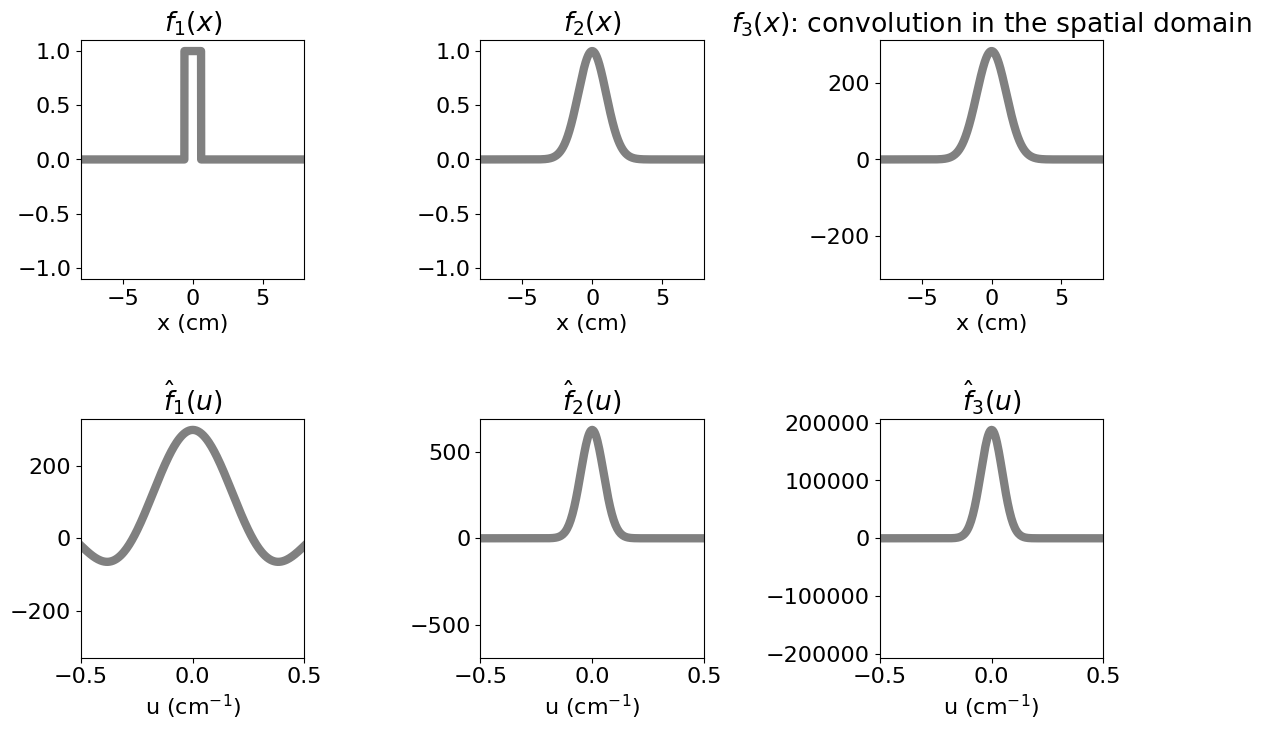

In [18]:
# Create a couple of signals to convolve
f1 = 1.0*(np.abs(x)<0.6)
f2 = 1.0*(np.exp(-x*x/2))
#f2 = np.sinc(x) # Let's revisit this example when we get to the discrete FT

# Now convolve them 
f3 = signal.convolve(f1, f2, mode='same')

# Now go to the Fourier domain
fhat1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f1)))
fhat2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f2)))
fhat3 = fhat1*fhat2

# Now back to the spatial domain
f3b = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat3)))

# Plot f1 and f2 and their convolution (and theit FTs)
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.rc('font', **font)
plt.plot(x,np.real(f1),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f1)),1.1*np.max(np.abs(f1))])
#plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f_1(x)$')
plt.subplot(2,3,2)
plt.rc('font', **font)
plt.plot(x,np.real(f2),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f2)),1.1*np.max(np.abs(f2))])
#plt.tick_params(axis='y',labelleft=False)
plt.xlabel('x (cm)')
plt.title('$f_2(x)$')
plt.subplot(2,3,3)
plt.rc('font', **font)
plt.plot(x,np.real(f3),'gray',linewidth=6.0)
plt.axis([-8,8,-1.1*np.max(np.abs(f3)),1.1*np.max(np.abs(f3))])
#plt.tick_params(axis='y',labelleft=False)
plt.title('$f_3(x)$: convolution in the spatial domain')
plt.xlabel('x (cm)')
plt.subplot(2,3,4)
plt.rc('font', **font)
plt.plot(x,np.real(fhat1),'gray',linewidth=6.0)
plt.axis([-0.5,0.5,-1.1*np.max(np.abs(fhat1)),1.1*np.max(np.abs(fhat1))])
#plt.tick_params(axis='y',labelleft=False)
plt.title(r'$\hat{f}_{1}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=2.0)
plt.subplot(2,3,5)
plt.rc('font', **font)
plt.plot(x,np.real(fhat2),'gray',linewidth=6.0)
plt.axis([-0.5,0.5,-1.1*np.max(np.abs(fhat2)),1.1*np.max(np.abs(fhat2))])
#plt.tick_params(axis='y',labelleft=False)
plt.title(r'$\hat{f}_{2}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=2.0)
plt.subplot(2,3,6)
plt.rc('font', **font)
plt.plot(x,np.real(fhat3),'gray',linewidth=6.0)
plt.axis([-0.5,0.5,-1.1*np.max(np.abs(fhat3)),1.1*np.max(np.abs(fhat3))])
#plt.tick_params(axis='y',labelleft=False)
plt.title(r'$\hat{f}_{3}(u)$')
plt.xlabel('u (cm$^{-1}$)')
plt.tight_layout(pad=2.0)


# Check whether the two versions are the same
difference = np.linalg.norm(f3 - f3b)
print("Norm of the difference: ||(f3 - f3b)|| = ", '{:f}'.format(difference))

# Let's revisit a few previous questions

## Q0 (not part of the quiz): Can the effect of an LSI system be undone? 

Can a convolution $g(x) = f(x) * h(x)$ be undone? In other words, if we know $g(x)$ (the output) and $h(x)$ (the convolution filter), do you think we can generally recover our input signal $f(x)$?} 

$\hat{f}_3(u) = \hat{f}_1(u)\hat{f}_2(u)$

$\hat{f}_1(u) = \hat{f}_3(u)/\hat{f}_2(u)$

So, we can undo the effect of an LSI system as long as $\hat{f}_2(u) \neq 0$ for any $u$ (ie: so that we can actually do the division shown above). If there are some values of $u$ such that $\hat{f}_2(u) = 0$, then we will not be able to recover those frequency components of $\hat{f}_1(u)$. 

## Q1: Non-zero output from zero input
We have a system such that for an input $f(\mathbf{r}) = 0$ it produces an output $g(\mathbf{r}) = 1$. Is it possible that this system is linear and shift-invariant? 

## Q2: Space-varying output from constant input
We have a system such that for an input $f(\mathbf{r}) = 1$ it produces an output $g(\mathbf{r}) =  \delta(\mathbf{r})$. Is it possible that this system is linear and shift-invariant? 

## Q3: A more complicated input/output pair
We have a system such that for an input $f(\mathbf{r}) = \hbox{sinc} (x)$ it produces an output $g(\mathbf{r}) = \hbox{sinc} (2x)$. Is it possible that this system is linear and shift-invariant? 